# alpha vantage data exploration

In [3]:
from alpha_vantage.timeseries import TimeSeries
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

api_key = "3PAPH3QCQ08JPD9E"

## download time series

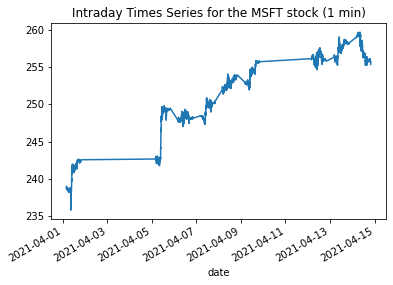

In [7]:
ts = TimeSeries(key=api_key, output_format='pandas')
data, meta_data = ts.get_intraday(symbol='MSFT',interval='1min', outputsize='full')
data['4. close'].plot()
plt.title('Intraday Times Series for the MSFT stock (1 min)')
plt.show()

In [9]:
meta_data

{'1. Information': 'Intraday (1min) open, high, low, close prices and volume',
 '2. Symbol': 'MSFT',
 '3. Last Refreshed': '2021-04-14 19:50:00',
 '4. Interval': '1min',
 '5. Output Size': 'Full size',
 '6. Time Zone': 'US/Eastern'}

In [11]:
data.head()

,1. open,2. high,3. low,4. close,5. volume
date,,,,,
2021-04-14 19:50:00,255.38,255.38,255.38,255.38,1075.0
2021-04-14 19:49:00,255.65,255.65,255.41,255.41,1520.0
2021-04-14 19:48:00,255.65,255.65,255.65,255.65,299.0
2021-04-14 19:38:00,255.80,255.80,255.80,255.80,100.0
2021-04-14 19:28:00,255.65,255.65,255.65,255.65,105.0
